# A Few Things Before We Start

### How to set Hugging Face Tokens
https://huggingface.co/settings/tokens


### Transformers Recap:
https://docs.google.com/presentation/d/1ayLUh6GB_Le9wO7SnycfLH7DuL2vaYs-wcEs5hACtn8/edit?usp=sharing


### Chat vs. Instruct:

Chat models are designed for conversational interactions, aiming to simulate human-like conversations. For example, chat models often find use in virtual assistants in customer support settings, where the input format is more informal and flexible.

In contrast, instruct models are designed to follow instructions and perform specific tasks based on those instructions. Examples here include tasks such as code generation and data summarisation. The input format for these types of models is more structured, requiring more formal prompts.



# Mistral AI
Mistral refers to a family of large language models developed by **Mistral AI**, a company founded in 2023 by former employees of leading AI organizations like Google DeepMind and Meta. Mistral's models aim to offer high performance while focusing on cost efficiency, adaptability, and open innovation.

<br>

**Overview of Mistral AI**
- **Founded**: 2023 by Timothée Lacroix, Guillaume Lample, and Arthur Mensch.
- **Mission**: Democratize access to powerful generative AI technologies by releasing open-weight models.
- **Approach**: Mistral emphasizes modular, fine-tuned, and open-weight architectures, enabling users to build customized AI applications efficiently.



# Mistral 7B

Mistral 7B is an advanced open-source Large Language Model (LLM) released by Mistral AI in late 2023. With 7 billion parameters, this model is designed to push the boundaries of efficiency and performance within a relatively small parameter count, enabling it to outperform larger competitors like Llama 2-13B on a range of benchmarks. Mistral 7B serves as a cornerstone of Mistral AI’s vision to democratize state-of-the-art language modeling through open, accessible, and highly capable models.

<br><br>

## **Key Characteristics and Architecture**  
- **Parameter Count**: Mistral 7B has approximately 7 billion parameters—significantly fewer than many flagship models from other organizations. Despite this, it achieves best-in-class performance among its size category.
  
- **Model Architecture**:  
  - **Transformer-Based**: Mistral 7B is a decoder-only Transformer model, similar to GPT-3.5, LLaMA, and other advanced LLMs. The core architectural building block is the multi-head self-attention mechanism.  
  - **Decoder-Only Architecture**: architecture based on the decoder block in the original Transformer
  - **Optimized Training Techniques**: Mistral AI uses state-of-the-art training techniques, extensive hyperparameter tuning, and carefully curated datasets to boost the model’s capabilities.  
  - **Enhanced Preprocessing**: The data preprocessing pipeline likely includes improved deduplication, quality filtering, and diversification techniques, contributing to the model’s broad generalization abilities.

- **Performance/Size Trade-off**: The model’s defining attribute is its ability to punch above its weight class. With fewer parameters, it is more memory-efficient, faster to run on consumer-grade hardware, and cheaper to host in a production environment, all while maintaining or surpassing the performance of certain much larger models.

<br><br>

## **Capabilities and Performance**  
- **Comparisons with Larger Models**: Benchmarks suggest Mistral 7B outperforms Llama 2-13B and other similarly sized or even larger models on various reasoning, comprehension, and instruction-following tasks.  
- **Reasoning and Comprehension**: The model demonstrates strong reasoning abilities, multi-step inference, and improved factual accuracy. It can handle complex instructions, follow logical chains of thought, and provide well-structured answers.
  
- **Versatility**: Mistral 7B is general-purpose. It can excel at code completion, content generation, summarization, translation, information extraction, and more. Fine-tuning can adapt the model for specialized verticals—like healthcare, finance, or legal—without sacrificing performance.
  
- **Latency and Efficiency**: With fewer parameters and optimized inference strategies, Mistral 7B can run efficiently on single GPUs, including consumer-grade hardware. This speed and accessibility open the door for a broader range of developers and startups to integrate advanced LLM capabilities into their products.

- **Open Weights**: Mistral 7B is released under an Apache 2.0 license, making its weights openly available for research, commercial, and community use. This openness stands in contrast to many proprietary models and signals Mistral AI’s commitment to democratized AI development.
  
- **Community Involvement**: By releasing the model weights, the company encourages the research community, enterprises, and independent developers to experiment, fine-tune, and customize Mistral 7B. This collective innovation model can lead to a rich ecosystem of tools, adapters, and improvements.

<br><br>
## **Limitations and Considerations**  
- **Hallucinations**: Like other LLMs, Mistral 7B may produce confident but factually incorrect statements. Users deploying it in production must implement safety checks, fact verification, and possibly fine-tune for improved reliability.
  
- **Context Length and Memory**: While Mistral 7B is efficient, it still has practical limits on how much context it can handle at once. Techniques like retrieval-augmented generation and efficient prompt management can mitigate this.
  
- **Continuous Improvement**: Mistral AI and the community are likely to refine future versions of Mistral to address shortcomings. As with all LLMs, progress is iterative, and user feedback helps direct enhancement efforts.



***RECHECK***
---

weight.



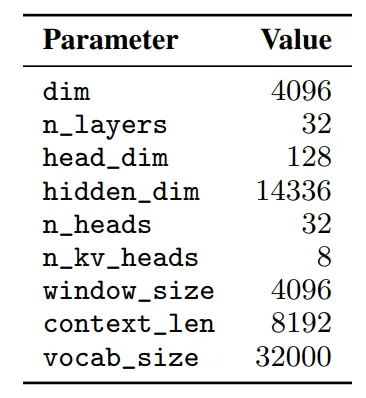

# Architecture

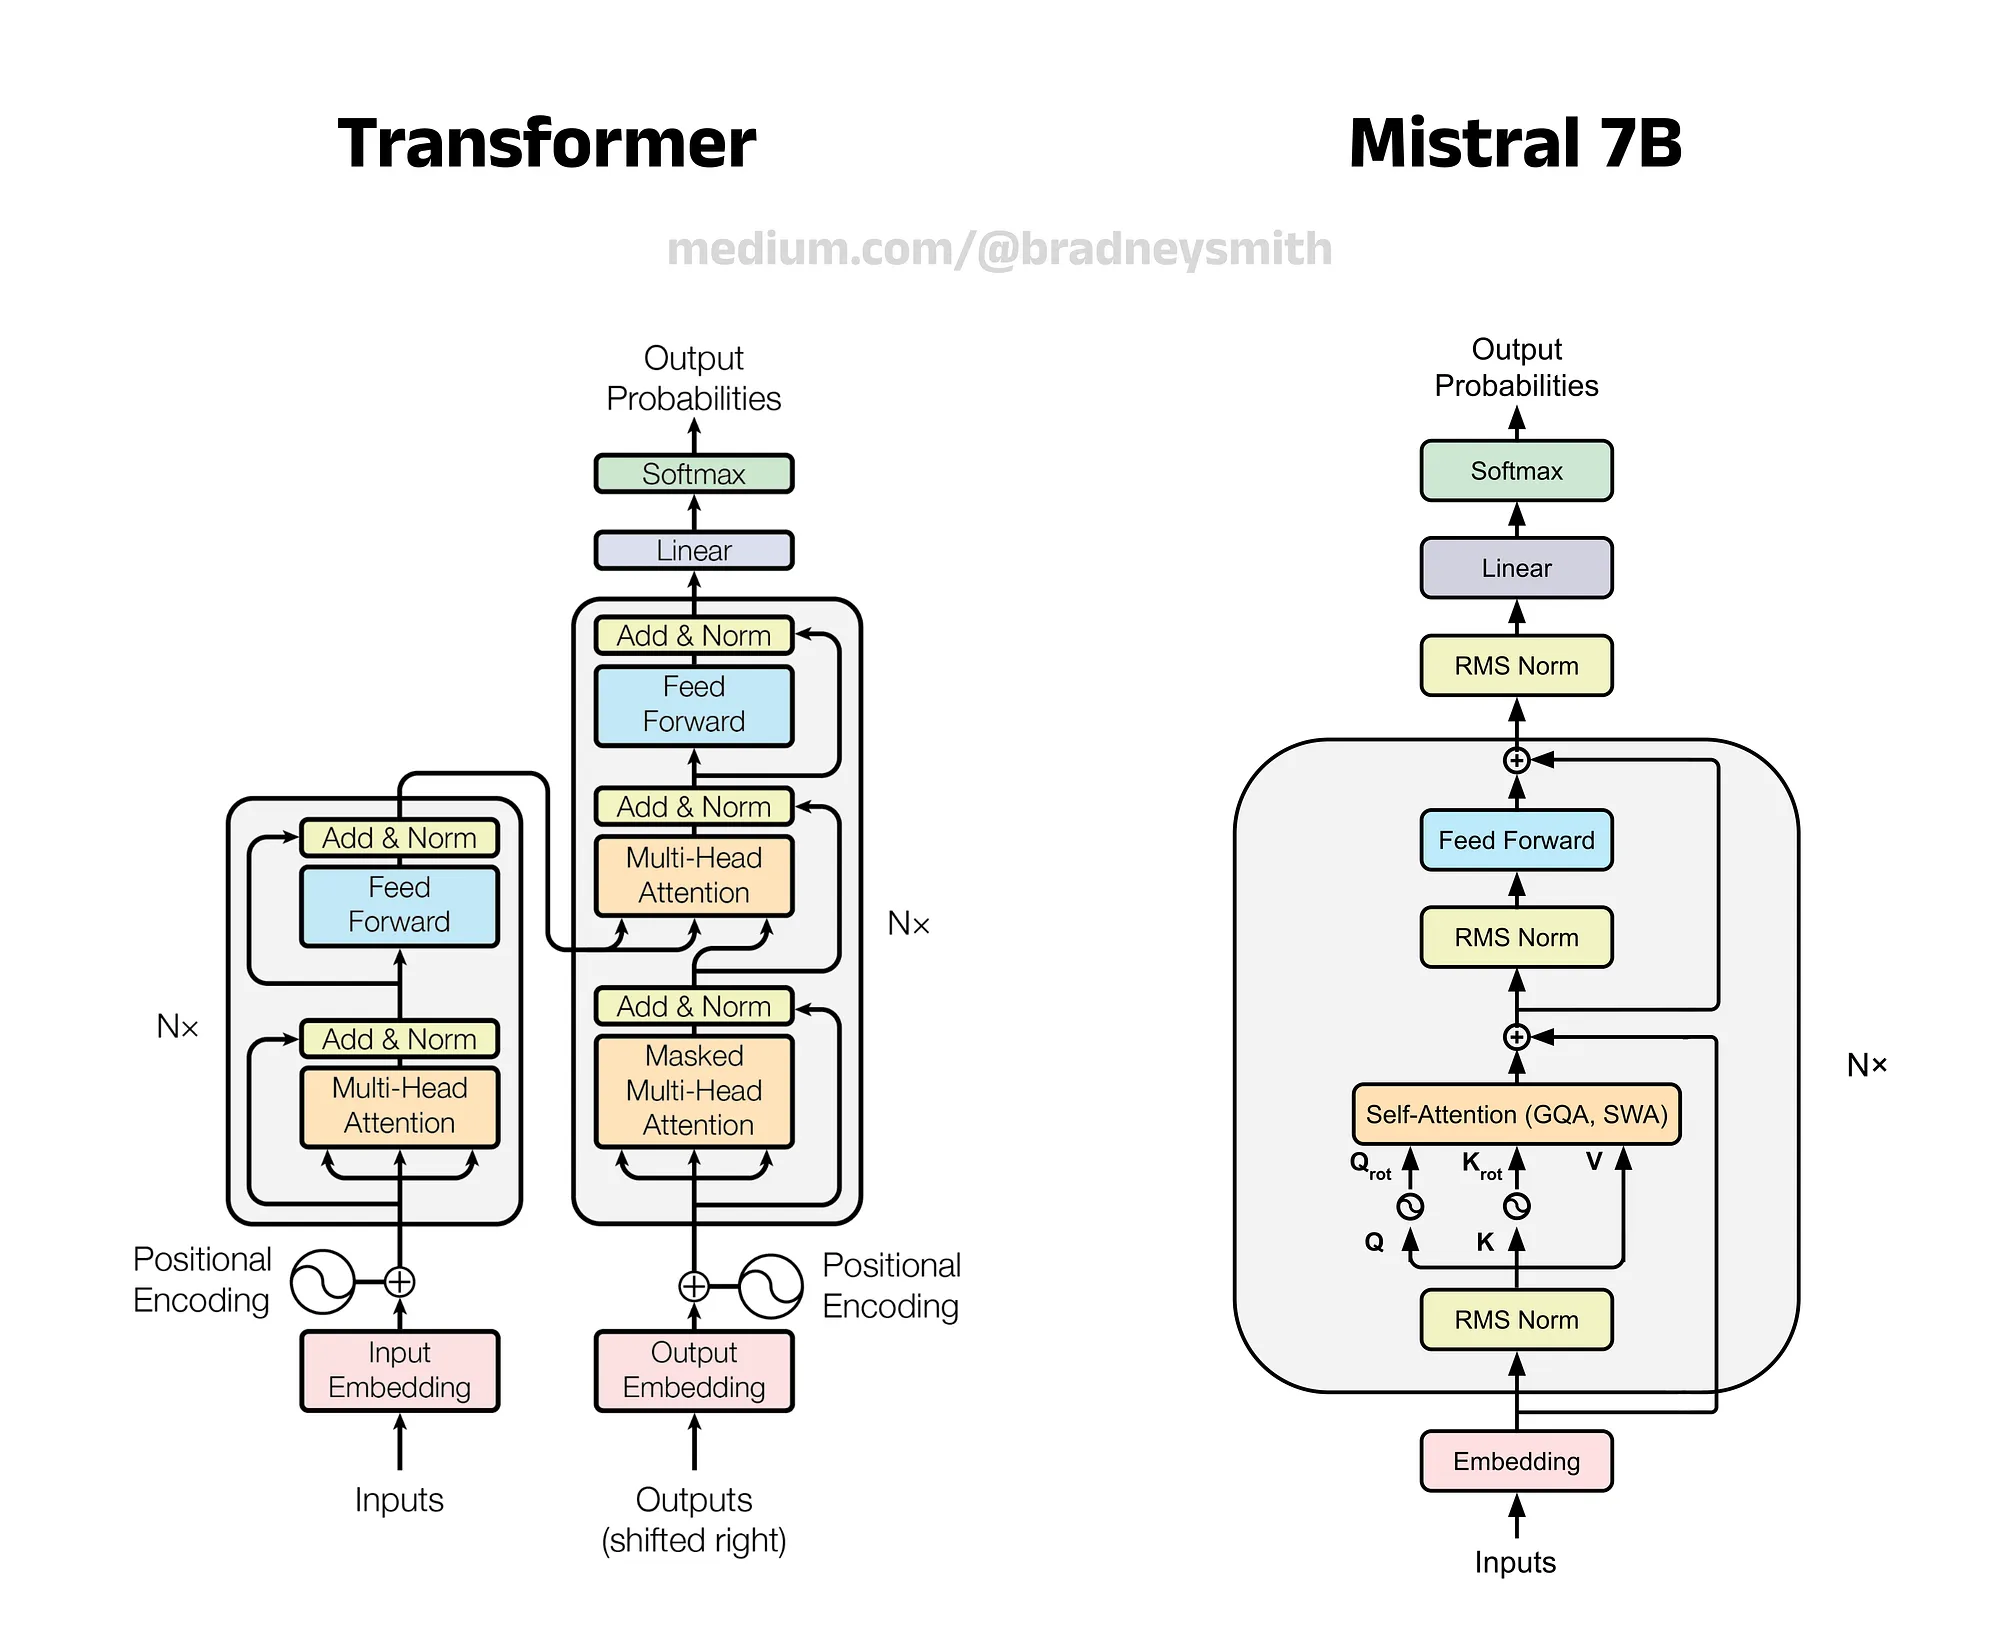

In line with their mission, Mistral AI have utilised a number of advancements to improve the efficiency of Mistral 7B, achieving a highly performant model with a fraction of the parameters. In the following sections we will explore these advancements, which include:

- RMS Normalization — replacing Layer Normalization
- Rotary Position Embedding (RoPE) — replacing Absolute Positional Encoding
- Grouped Query Attention (GQA) — replacing Multi-Head Attention
- Sliding Window Attention (SWA) — improving training and inference speed, particularly for long sequences
- Rolling Buffer KV Cache — improving training and inference speed, in conjunction with SWA
- SwiGLU Activation Function — replacing ReLU in the Feed Forward & Linear sub-layers

## Rotary Position Embedding (RoPE)

Unlike older architectures (such as Recurrent Neural Networks), Transformer-based models process all of their input tokens in parallel, not sequentially. While this parallel processing improves speed, it also results in a loss of positional information since the tokens are not processed in order. Therefore, some form of positional encoding is needed to inject this information back into the embedding vectors, and this can be achieved in various ways.


Absolute Positional Encoding:
The sinusoidal positional encoding technique introduced in the original Transformer uses sine and cosine functions to create a positional encoding vector for each token in the input sequence. These vectors are then added to the learned embeddings via vector addition.


One limitation of this approach is that it only represents the absolute position of tokens, not their relative distances. For instance, the distance between the tokens in positions 3 and 5 of a sequence versus 103 and 105 is identical, but this information is not captured with absolute positional encoding. Intuitively, tokens that are closer together in a larger context are likely to be more relevant, and encoding this information about relative positioning could significantly improve model performance.

Rotary embeddings were introduced by Su et al. in their 2020 paper “RoFormer: Enhanced Transformer with Rotary Position Embedding”, and offer a unique approach to encoding positional information.

Unlike sinusoidal encoding, which adds positional information directly to the token embeddings, rotary embeddings instead apply a rotation to the query and key vectors for each token. The rotation angle for each token is based on its absolute position in the sequence.

For example, in the input “write a poem about a man fishing on a river bank”, the query and key vectors for poem (at position 2) are rotated by 2θ, while the query and key vectors for man (at position 5) are rotated by 5θ, and so on. Note that token position is zero-indexed, meaning we start counting at 0 instead of 1 (therefore write is said to be at position 0 and so its query and key vectors are not rotated). This approach captures not only the absolute position of the token but also the relative positions, since man and poem are 3θ apart, which represents a distance of 3 tokens.

The benefits of RoPE can be summarised as:

- Efficient implementation of encoding the relative position between tokens
- Improved model performance with longer sequences (due to better learning of short and long-range dependencies)
- Easily compatible with the existing dot product self-attention mechanism

## Grouped Query Attention (GQA)

Rememeber Multi-Head Attention splits the attention mechanism into H independent heads, each learning its own smaller set of weight matrices. These weights are used to calculate a set of smaller, head-specific Query, Key, and Value matrices (denoted Q^h, K^h, and V^h). Each head processes the input sequence independently, generating distinct attention outputs.

In GQA, Key and Value matrices are shared between G groups of heads, where the group size is determined by the user.

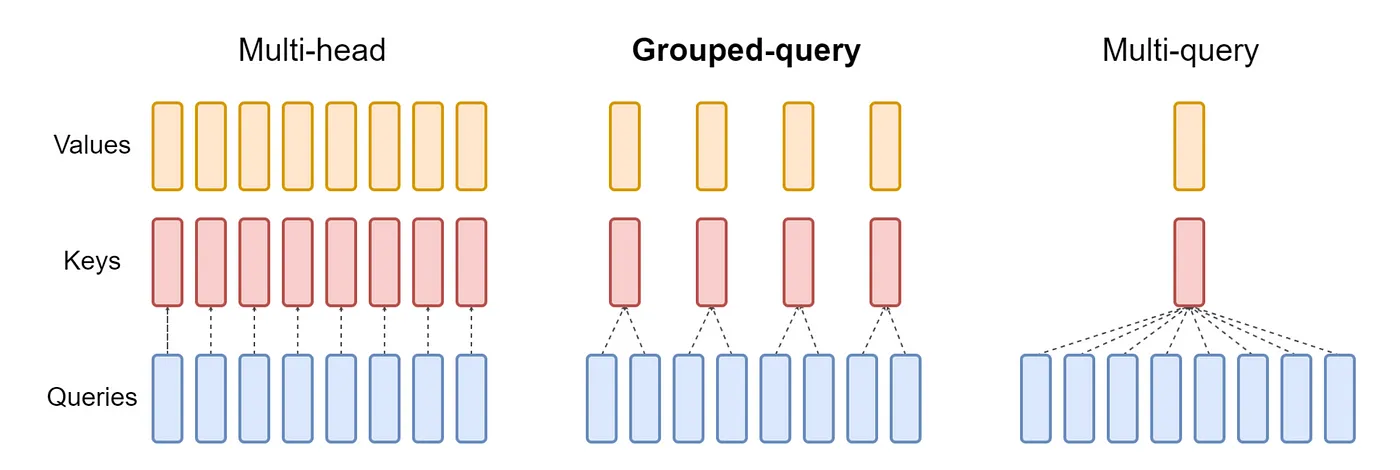

## Sliding Window Attention

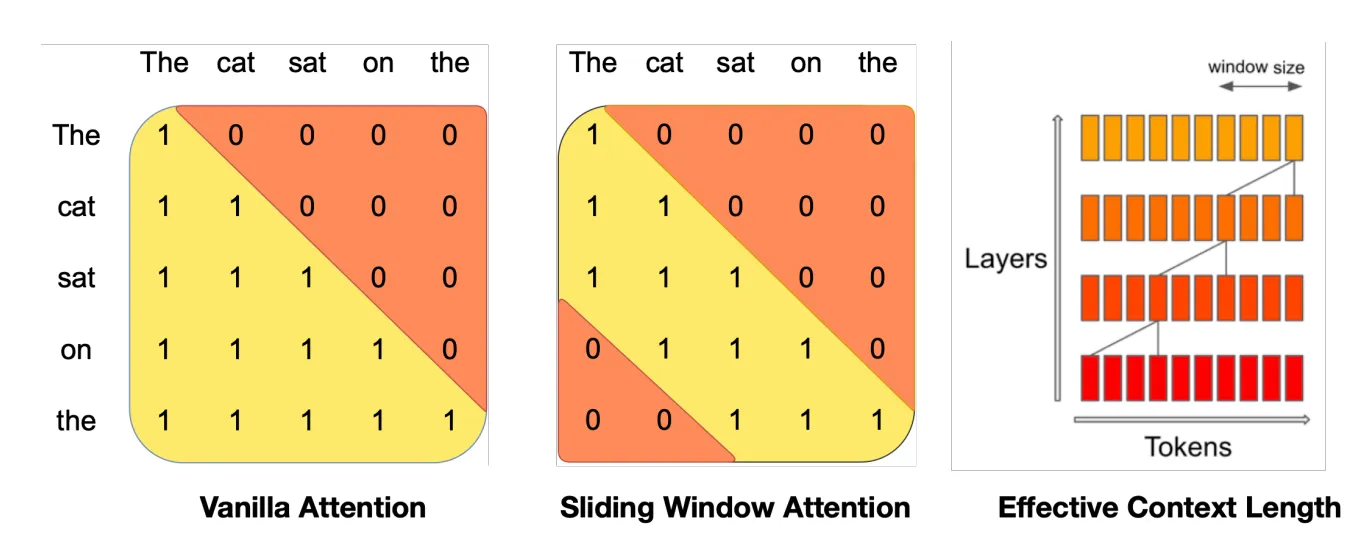

Sliding Window Attention leverages the layers of a transformer model to extend its attention beyond a fixed window size, denoted as W. In SWA, the hidden state at position i in layer k can attend to hidden states from the preceding layer within the range of positions i — W to i, allowing access to tokens at a distance of up to W * k tokens. By employing a window size of W = 4096 tokens, SWA theoretically achieves an attention span of approximately 131K tokens.

## Rolling Buffer Cache

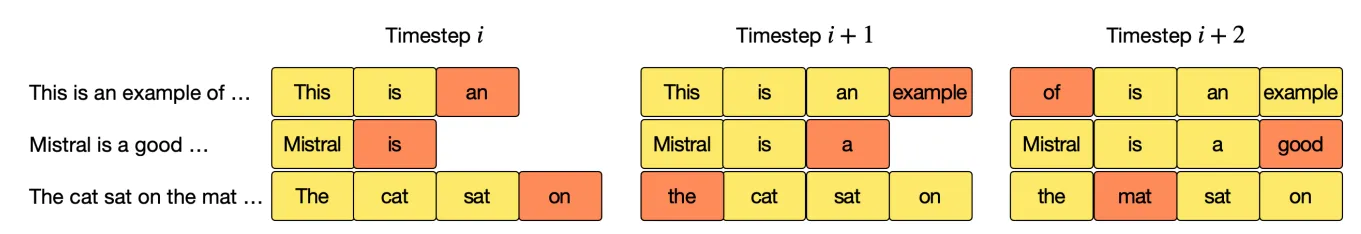

A Rolling Buffer Cache, employs a fixed attention span to limit cache size. The cache is of fixed size W, and it stores keys and values for timestep i at position i mod W in the cache. When i exceeds W, earlier values are overwritten, halting cache size growth. For instance, with W = 3, on a 32k-token sequence, cache memory usage is reduced by 8x without compromising model quality.

## Pre-fill and chunking
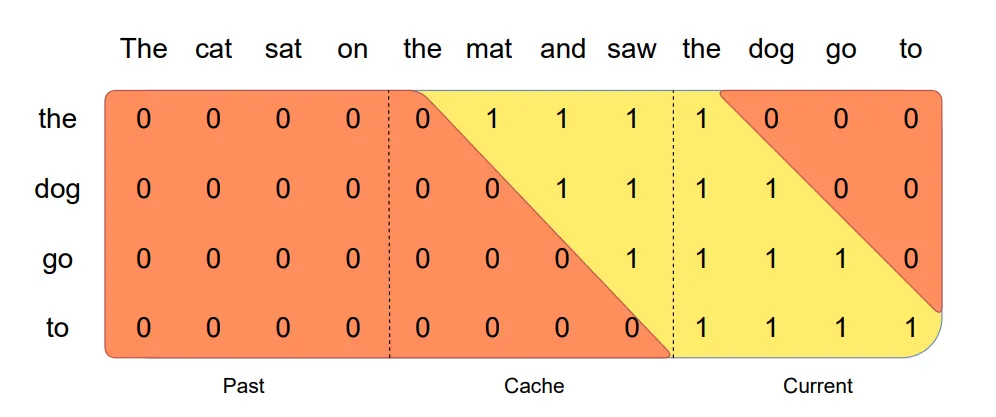

In sequence generation, tokens are predicted sequentially based on prior context. To optimize efficiency, a (k, v) cache is pre-filled with the known prompt. If the prompt is very long, it is chunked into smaller segments using a chosen window size. Each chunk is used to pre-fill the cache. This approach involves computing attention both within the cache and over the current chunk, Thus aiding in more effective sequence generation.

In [ ]:
from transformers import AutoModelForCausalLM, AutoTokenizer
from google.colab import userdata

# import torch
# device = "cuda" if torch.cuda.is_available() else "cpu"


model = AutoModelForCausalLM.from_pretrained("mistralai/Mistral-7B-v0.1", device_map="auto", token=userdata.get('HF_TOKEN'))
tokenizer = AutoTokenizer.from_pretrained("mistralai/Mistral-7B-v0.1", token=userdata.get('HF_TOKEN'))

prompt = "My favourite coffee is"

input_ids = tokenizer([prompt], return_tensors="pt").to("cuda")
# model.to(device)

logits = model.generate(**input_ids, max_new_tokens=100, do_sample=True)
postprocessed_output = tokenizer.batch_decode(logits)[0]

print(postprocessed_output)

The instruction tuned model can be used as follows:



```python

from transformers import AutoModelForCausalLM, AutoTokenizer

model = AutoModelForCausalLM.from_pretrained("mistralai/Mistral-7B-Instruct-v0.2", device_map="auto")
tokenizer = AutoTokenizer.from_pretrained("mistralai/Mistral-7B-Instruct-v0.2")

messages = [
    {"role": "user", "content": "What is your favourite condiment?"},
    {"role": "assistant", "content": "Well, I'm quite partial to a good squeeze of fresh lemon juice. It adds just the right amount of zesty flavour to whatever I'm cooking up in the kitchen!"},
    {"role": "user", "content": "Do you have mayonnaise recipes?"}
]

model_inputs = tokenizer.apply_chat_template(messages, return_tensors="pt").to("cuda")

generated_ids = model.generate(model_inputs, max_new_tokens=100, do_sample=True)
tokenizer.batch_decode(generated_ids)[0]
```

## Benchmarks

Mistral was evaluated against the following benchmarks:

- Commonsense Reasoning (0-shot): Hellaswag, Winogrande, PIQA, SIQA, OpenbookQA, ARC-Easy ARC-Challenge, CommonsenseQA
- World Knowledge (5-shot): NaturalQuestions, TriviaQA
- Reading Comprehension (0-shot): BoolQ, QuAC
- Math: GSM8K (8-shot) with maj@8 and MATH (4-shot) with maj@4
- Code: Humaneval (0-shot) and MBPP (3-shot)
- Popular aggregated results: MMLU (5-shot), BBH (3-shot), and AGI Eval (3–5-shot, English multiple-choice questions only)

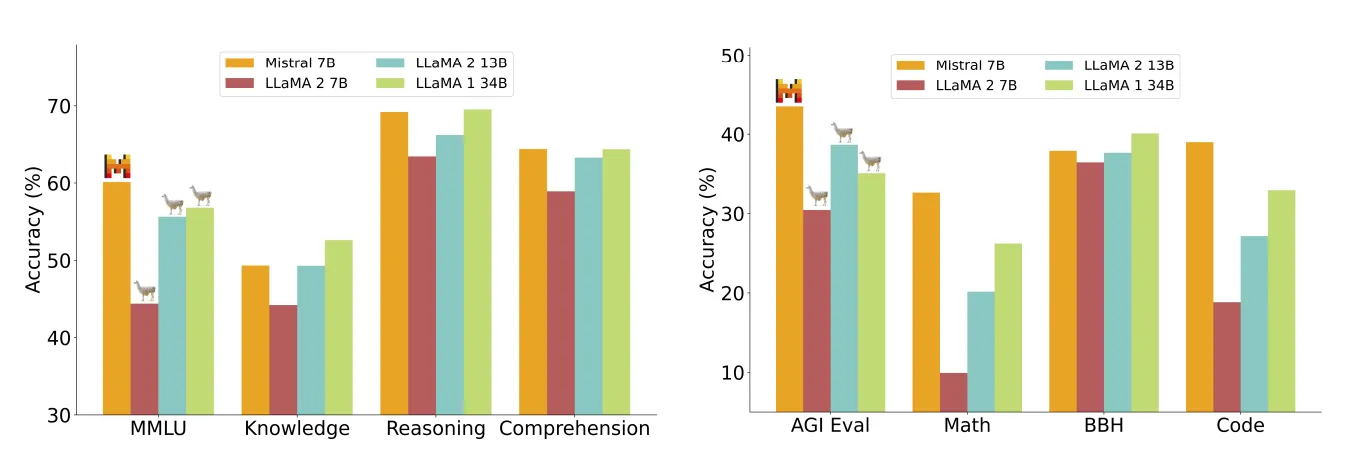

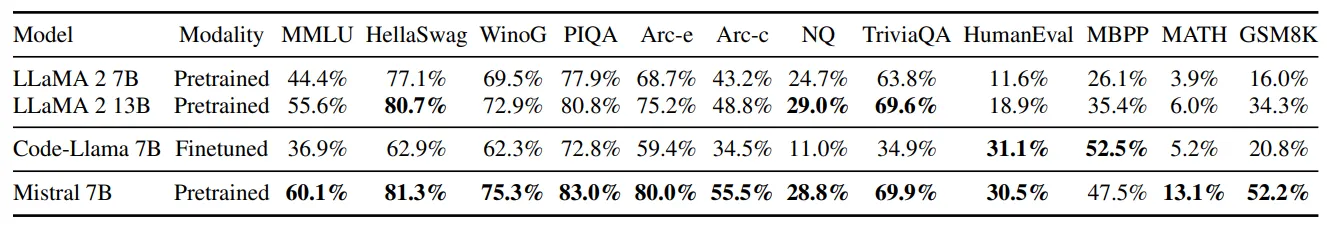

- Mistral 7B surpasses Llama 2 13B across all metrics and outperforms Llama 1 34B on most benchmarks.
- In particular, Mistral 7B displays superior performance in code, mathematics, and reasoning benchmarks.

# Some Variations of Mistral

### Mistral 7B-v0.2
Mistral-7B-v0.2 has the following changes compared to Mistral-7B-v0.1

- 32k context window (vs 8k context in v0.1)
- Rope-theta = 1e6
- No Sliding-Window Attention

### Mistral 7B-v0.3
Mistral-7B-v0.3 has the following changes compared to Mistral-7B-v0.2

- Extended vocabulary to 32768
- Supports v3 Tokenizer
- Supports function calling

### Codestral 22B
Codestral is a 22B open-weight code model, specifically designed for code generation tasks, which is an open-weight generative AI model. It is trained on a diverse dataset of over 80 programming languages, including popular ones like Python, Java, C, C++, JavaScript, and Bash, as well as more specific ones like Swift and Fortran. This broad language base enables Codestral to assist developers in various coding environments and projects.

### Mathstral
Mathstral is a 7B model designed for math reasoning and scientific discovery based on Mistral 7B specializing in STEM subjects. It achieves state-of-the-art reasoning capacities in its size category across various industry-standard benchmarks. The model has a 32k context window.

### Mistral Nemo
Mistral NeMo is a 12B language model built in collaboration with NVIDIA. It features a large context window of up to 128k tokens and state-of-the-art reasoning, world knowledge, and coding accuracy.

### Mistral Large 2
Mistral Large 2 is a 123B model, offering significant improvements in code generation, mathematics, and reasoning capabilities compared to its predecessor. It also provides advanced function calling capabilities. It has a 128k context window. It Support for dozens of languages (including French, German, Spanish, Italian, Portuguese, Arabic, Hindi, Russian, Chinese, Japanese, and Korean) and over 80 coding languages (such as Python, Java, C, C++, JavaScript, and Bash).

### Ministral
Ministral are 3B and 8B are models for on-device computing and at-the-edge use cases. Both models support up to 128k context length (currently 32k on vLLM). Ministral 8B has a special interleaved sliding-window attention pattern for faster and memory-efficient inference.